In [1]:
import sqlite3 as sql
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
db = "/home/eric/Documents/franklin/narsc2018/generated_data/narsc18.sqlite"
con = sql.connect(db)
qry = '''
SELECT A.*,
B.CL8AA1990 AS pop90,
B.CL8AA2000 AS pop00,
B.CL8AA2010 AS pop10,
C.metro_status,
C.economic_type_label
FROM county_entropy_index AS A JOIN nhgis_pop_race_norm_90_10 AS B
ON A.GISJOIN = B.GISJOIN
JOIN usda_typology_2015 AS C ON B.STATEA || B.COUNTYA = C.fips;
'''
df = pd.read_sql(qry, con, index_col='GISJOIN')
con.close()

In [3]:
df.head()

,entropy_r_10,total_r_10,entropy_index_10,entropy_r_00,total_r_00,entropy_index_00,entropy_r_90,total_r_90,entropy_index_90,pop90,pop00,pop10,metro_status,economic_type_label
GISJOIN,,,,,,,,,,,,,,
G0100010,0.662470,54571,0.119872,0.594427,43672.89,0.191369,0.574266,34223.67,0.273471,34223.68,43672.90,54571,1,Nonspecialized
G0100030,0.583661,182265,0.142878,0.486592,140415.00,0.202772,0.493293,98280.00,0.285886,98280.00,140415.00,182265,1,Recreation
G0100050,0.903147,27457,0.139656,0.809245,29038.85,0.116351,0.735968,25417.62,0.144763,25417.62,29038.85,27457,0,Maufacturing
G0100070,0.648795,22915,0.166713,0.606501,20826.41,0.161091,0.545190,16610.89,0.109452,16610.89,20826.41,22915,1,Nonspecialized
G0100090,0.406089,57322,0.119005,0.317693,51028.62,0.148188,0.143022,39251.65,0.243028,39251.65,51028.61,57322,1,Nonspecialized


In [4]:
# calc pop change
df['ppctchg_0010'] = ( df['pop10'] - df['pop00'] ) * 1.0 / df['pop00'] * 100

In [5]:
len(df)

2403

/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


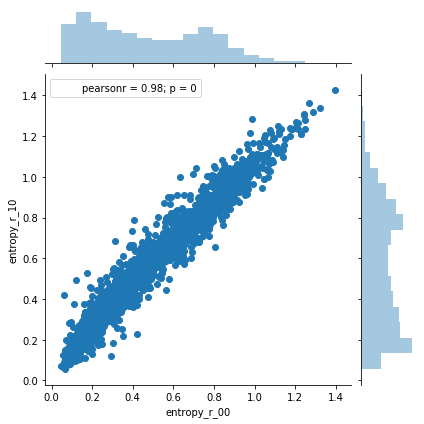

In [6]:
# plot entropy index in 2000 against 2010 values
sns.jointplot('entropy_r_00', 'entropy_r_10', df)

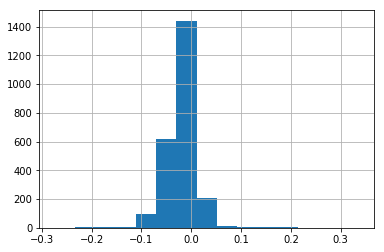

In [7]:
# plot pop change against change in entropy
df['entropy_diff_00_10'] = df['entropy_index_10'] - df['entropy_index_00']
df['entropy_diff_00_10'].hist(bins=15)

/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/eric/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


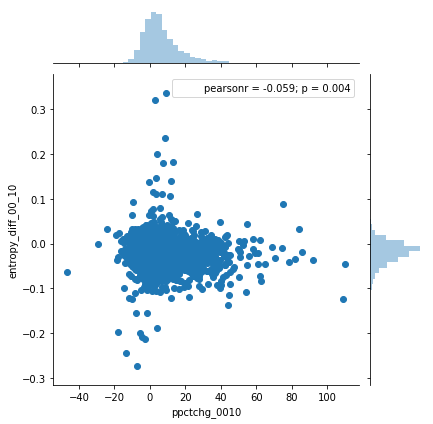

In [8]:
sns.jointplot('ppctchg_0010', 'entropy_diff_00_10', df)

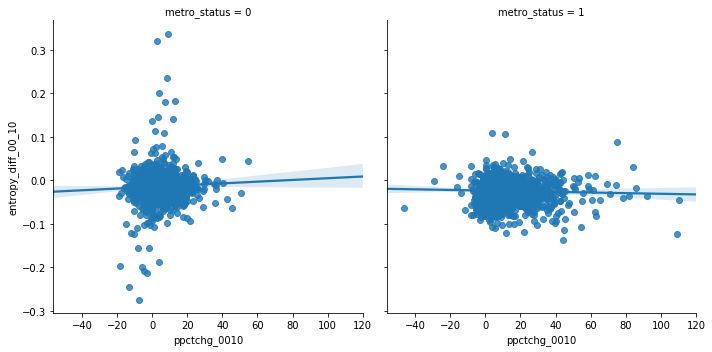

In [9]:
sns.lmplot('ppctchg_0010', 'entropy_diff_00_10', df, col='metro_status')

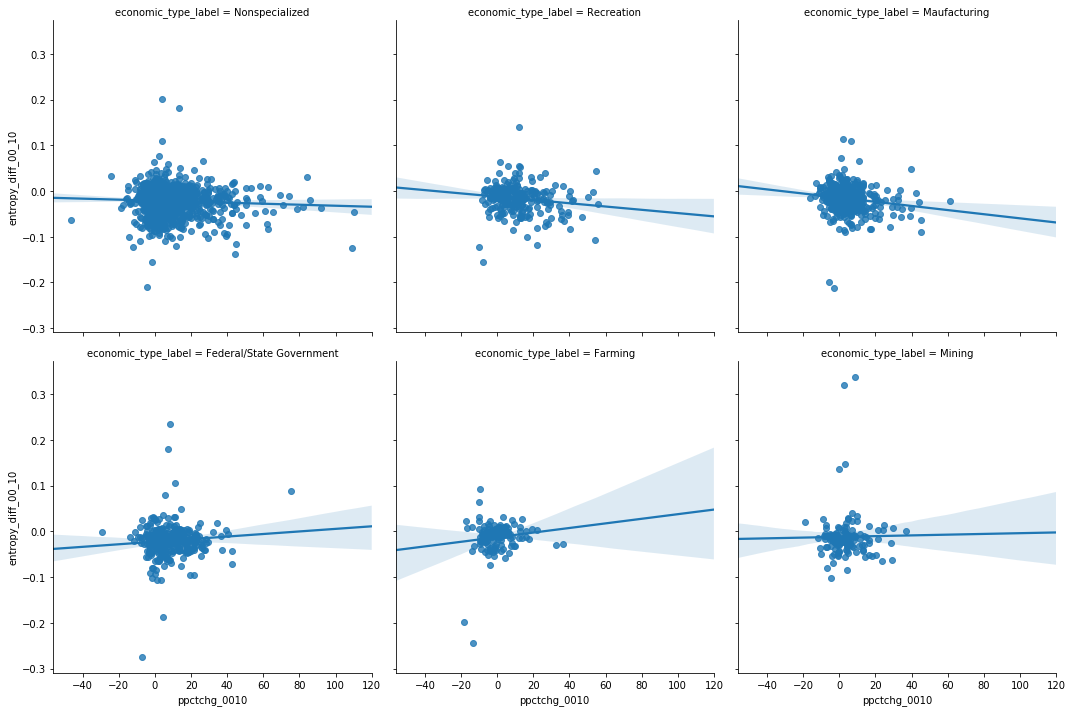

In [10]:
sns.lmplot('ppctchg_0010', 'entropy_diff_00_10', df, col='economic_type_label', col_wrap=3)